In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned-online-retail-datasets/cleaned_Online_Retail_Dataset.csv


# Setting up the environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go

# Data loading

In [4]:
df_retail=pd.read_csv('/kaggle/input/cleaned-online-retail-datasets/cleaned_Online_Retail_Dataset.csv')
df_retail.head()

,Customer ID,Invoice,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,InvoiceHour,InvoiceDaypart,Price,...,Reason_Category,Non_Sale_Quantity,Financial_Impact,Customer_Type,Customer_Invoice_Count,Customer_Quantity_Sum,Customer_Revenue_Sum,Recency_Days,Monetary_Value,Avg_Order_Value
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,08:26:00,8,Morning,2.55,...,Valid Sale,0,0.0,Customer,34,1733,5391.21,372,158.565,139.12
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01,08:26:00,8,Morning,3.39,...,Valid Sale,0,0.0,Customer,34,1733,5391.21,372,158.565,139.12
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,08:26:00,8,Morning,2.75,...,Valid Sale,0,0.0,Customer,34,1733,5391.21,372,158.565,139.12
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,08:26:00,8,Morning,3.39,...,Valid Sale,0,0.0,Customer,34,1733,5391.21,372,158.565,139.12
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,08:26:00,8,Morning,3.39,...,Valid Sale,0,0.0,Customer,34,1733,5391.21,372,158.565,139.12


In [5]:
df_retail.columns

Index(['Customer ID', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'InvoiceTime', 'InvoiceHour', 'InvoiceDaypart', 'Price',
       'Country', 'TotalAmount', 'Category', 'Invoice_Type', 'Is_Valid_Sale',
       'Revenue', 'Is_Positive_Quantity', 'Reason_Category',
       'Non_Sale_Quantity', 'Financial_Impact', 'Customer_Type',
       'Customer_Invoice_Count', 'Customer_Quantity_Sum',
       'Customer_Revenue_Sum', 'Recency_Days', 'Monetary_Value',
       'Avg_Order_Value'],
      dtype='object')

# Checking if a customer can have multiple invoice

In [6]:
check_invoice_count=df_retail.groupby('Customer ID')['Invoice'].nunique().reset_index()
check_invoice_count.columns=['Customer ID','InvoiceCount']
print(check_invoice_count.sort_values(by='InvoiceCount', ascending=False))

         Customer ID  InvoiceCount
4372  Guest Customer          3710
1895           14911           248
330            12748           224
4042           17841           169
1674           14606           128
...              ...           ...
2279           15428             1
1488           14355             1
1490           14357             1
3458           17030             1
58             12420             1

[4373 rows x 2 columns]


# Creating bin

In [7]:
bins=[0,1,2,5,10,20,30,40,50,float('inf')]
labels = [
    '1',
    '2',
    '3–5',
    '6–10',
    '11–20',
    '21–30',
    '31–40',
    '41–50',
    '51+'
]
check_invoice_count['Order Number Category']= pd.cut(check_invoice_count['InvoiceCount'], bins=bins,labels=labels)
print(check_invoice_count.sort_index().head())


  Customer ID  InvoiceCount Order Number Category
0       12346             2                     2
1       12347             7                  6–10
2       12348             4                   3–5
3       12349             1                     1
4       12350             1                     1


# Finding number of customers based on order number segmentation

In [8]:
check_invoice_order_count=check_invoice_count['Order Number Category'].value_counts().reset_index() 
check_invoice_order_count.columns=['Order Number Category','Customers_Count'] 
print(check_invoice_order_count)

  Order Number Category  Customers_Count
0                     1             1313
1                   3–5             1155
2                     2              817
3                  6–10              628
4                 11–20              317
5                 21–30               78
6                 31–40               26
7                   51+               25
8                 41–50               14


# Invoice distribution

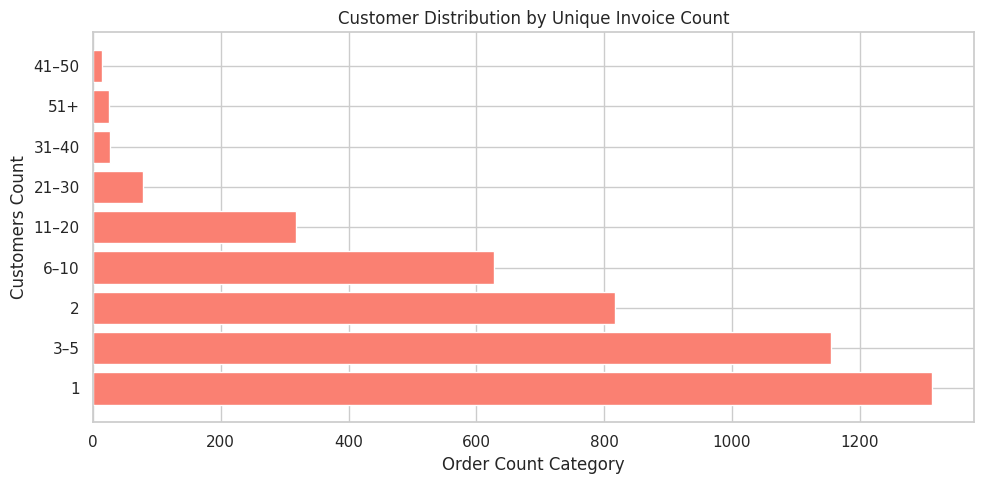

In [9]:
plt.figure(figsize=(10,5))
plt.barh(check_invoice_order_count['Order Number Category'],check_invoice_order_count['Customers_Count'],color='salmon')
plt.xlabel('Order Count Category')
plt.ylabel('Customers Count')
plt.title('Customer Distribution by Unique Invoice Count')
plt.tight_layout()
plt.show()

In [10]:
# 1. Calculate the frequency of unique invoice counts (How many customers have 1 order, 2 orders, etc.)
# invoice_distribution = check_invoice_count['InvoiceCount'].value_counts().reset_index()

# 2. Rename columns for better readability
# invoice_distribution.columns = ['InvoiceCount', 'Number_of_customers']

# 3. Display the resulting distribution table
# print(invoice_distribution)

# Dimensions, Measures and Magnatitute Exploration 

# Eda for Country

In [11]:
Distinctcountry=df_retail['Country'].unique()
DistinctcountryCount=df_retail['Country'].nunique()
DistinctcountryValueCount=df_retail['Country'].value_counts()
print(Distinctcountry)
print(DistinctcountryCount)
print(DistinctcountryValueCount)

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38
Country
United Kingdom          495478
Germany                   9495
France                    8558
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401

# EDA for Reason Category

In [12]:
reason_category_EDA=df_retail['Reason_Category'].value_counts().reset_index()
reason_category_EDA.columns=['Reason_Category','Reason_category_counts']
print(reason_category_EDA)

           Reason_Category  Reason_category_counts
0               Valid Sale                  526578
1                   Return                   10624
2   Postage / Shipping Fee                    1837
3   Damaged / Missing Item                    1603
4      Fraud / False Order                     920
5        Manual Adjustment                     342
6  Unknown / Miscellaneous                       6


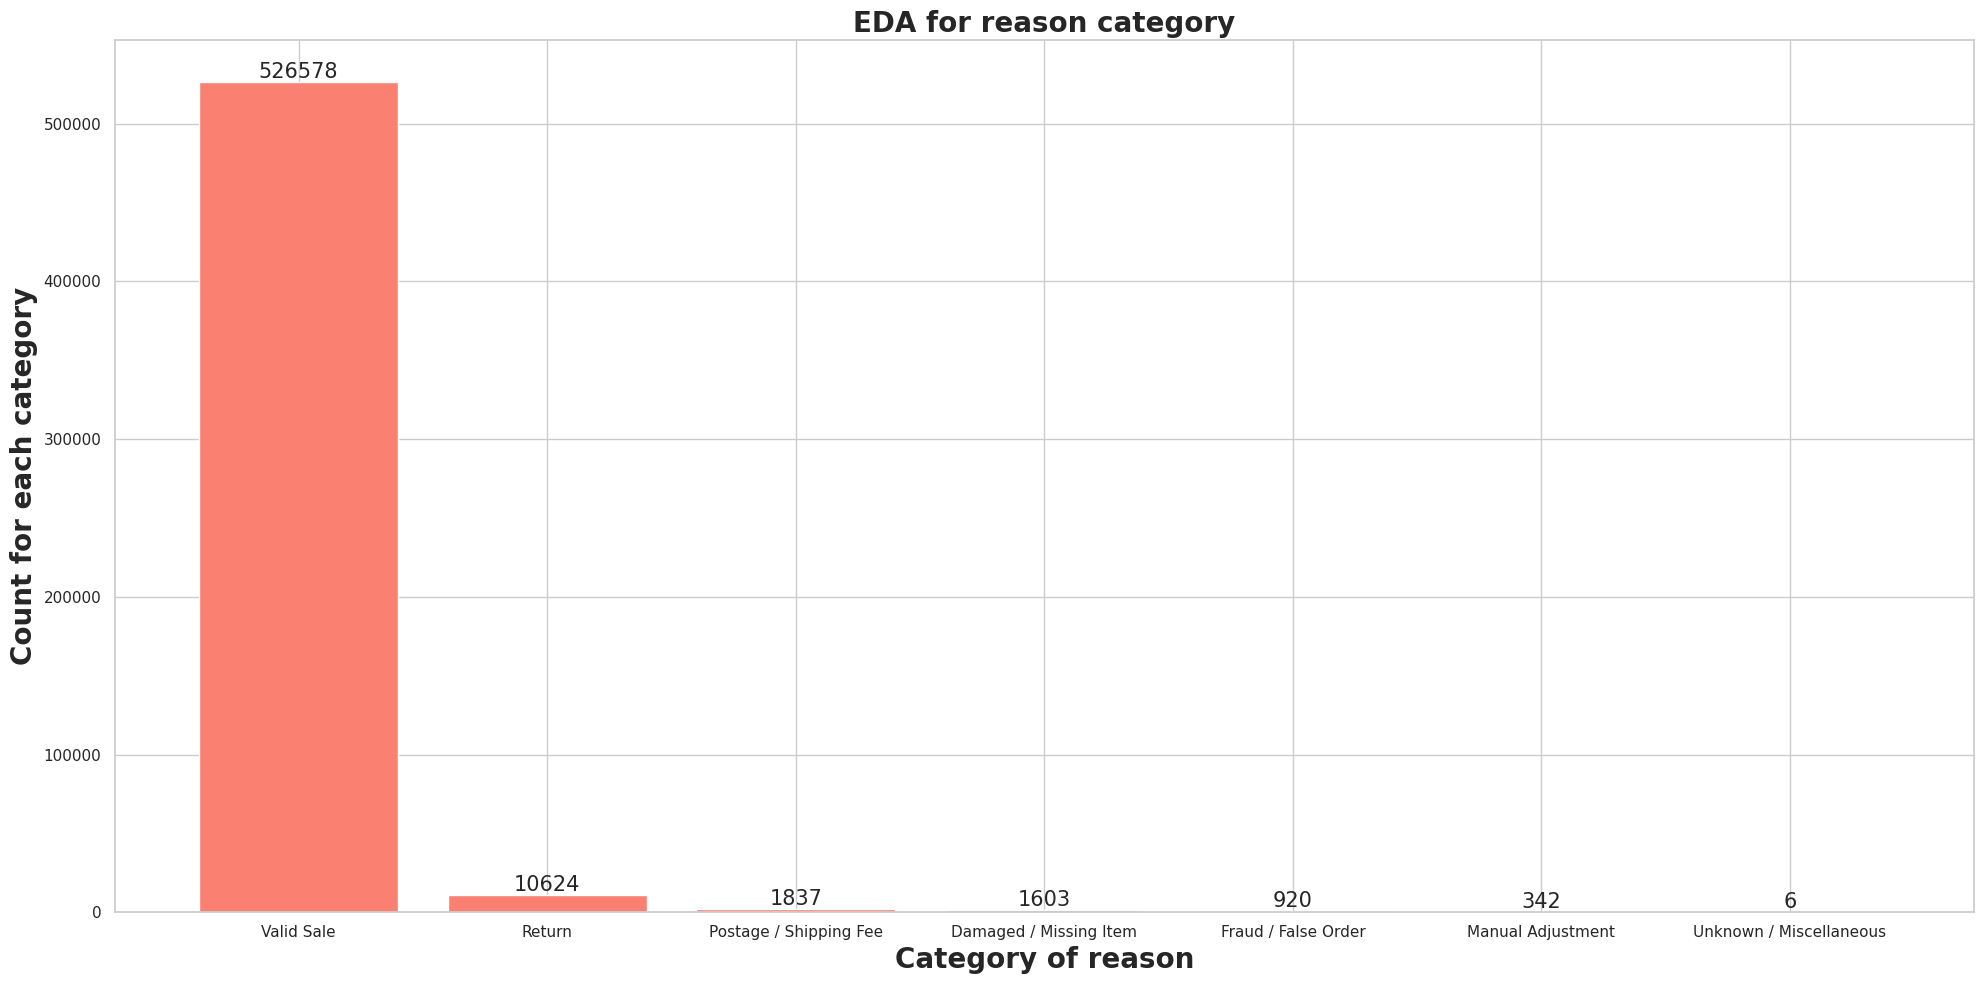

In [13]:
plt.figure(figsize=(20,10))
bar1=plt.bar(reason_category_EDA['Reason_Category'],reason_category_EDA['Reason_category_counts'],color='salmon')
for bar in bar1:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+5,yval,ha='center', va='bottom', fontsize=15)
plt.xlabel('Category of reason',fontsize=20,fontweight='bold')
plt.ylabel('Count for each category',fontsize=20,fontweight='bold')
plt.title('EDA for reason category',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

# EDA for Category

In [14]:
print(df_retail['Category'].unique())

['Electronics & Misc' 'Lighting' 'Kitchenware' 'Gardening & Outdoor'
 'Decor' 'Containers' 'Home Decor' 'Warmers' 'Home Hardware'
 'Toys & Games' 'Household Essentials' 'Bath & Personal Care' 'Furniture'
 'Soft Furnishings' 'Craft & DIY' 'Postal & Shipping' 'Jewelry'
 'Apparel & Accessories' 'Paper & Stationery' 'Kitchen & Dining'
 'Shopping & Storage' 'Seasonal & Holiday' 'Financial Accessories'
 'Magnets & Accessories' 'Artificial Flowers & Plants'
 'Gift Sets & Vouchers' 'Stock Condition' 'Party Supplies' 'Other'
 'Tableware & Decor' 'Stationery']


In [15]:
Category_EDA=df_retail['Category'].value_counts().reset_index()
Category_EDA.columns=['Category','Counts for per category']
print(Category_EDA)

                       Category  Counts for per category
0                    Home Decor                   126043
1                   Kitchenware                   110685
2                  Toys & Games                    46741
3            Paper & Stationery                    39108
4         Apparel & Accessories                    37740
5                    Containers                    34828
6                       Jewelry                    26260
7                         Decor                    18357
8          Bath & Personal Care                    15511
9            Electronics & Misc                    14958
10           Seasonal & Holiday                    11971
11         Household Essentials                    10530
12          Gardening & Outdoor                     8721
13  Artificial Flowers & Plants                     8395
14         Gift Sets & Vouchers                     6878
15             Soft Furnishings                     4369
16                Home Hardware

# EDA for Invoice_Type & Is_Valid_Sale



In [16]:
print(df_retail['Invoice_Type'].unique())

EDA_Invoice_type=df_retail['Invoice_Type'].value_counts().reset_index()
EDA_Invoice_type.columns=['Invoice_Type','InvoiceCounts']
print(EDA_Invoice_type)

['Sale' 'Return']
  Invoice_Type  InvoiceCounts
0         Sale         531286
1       Return          10624


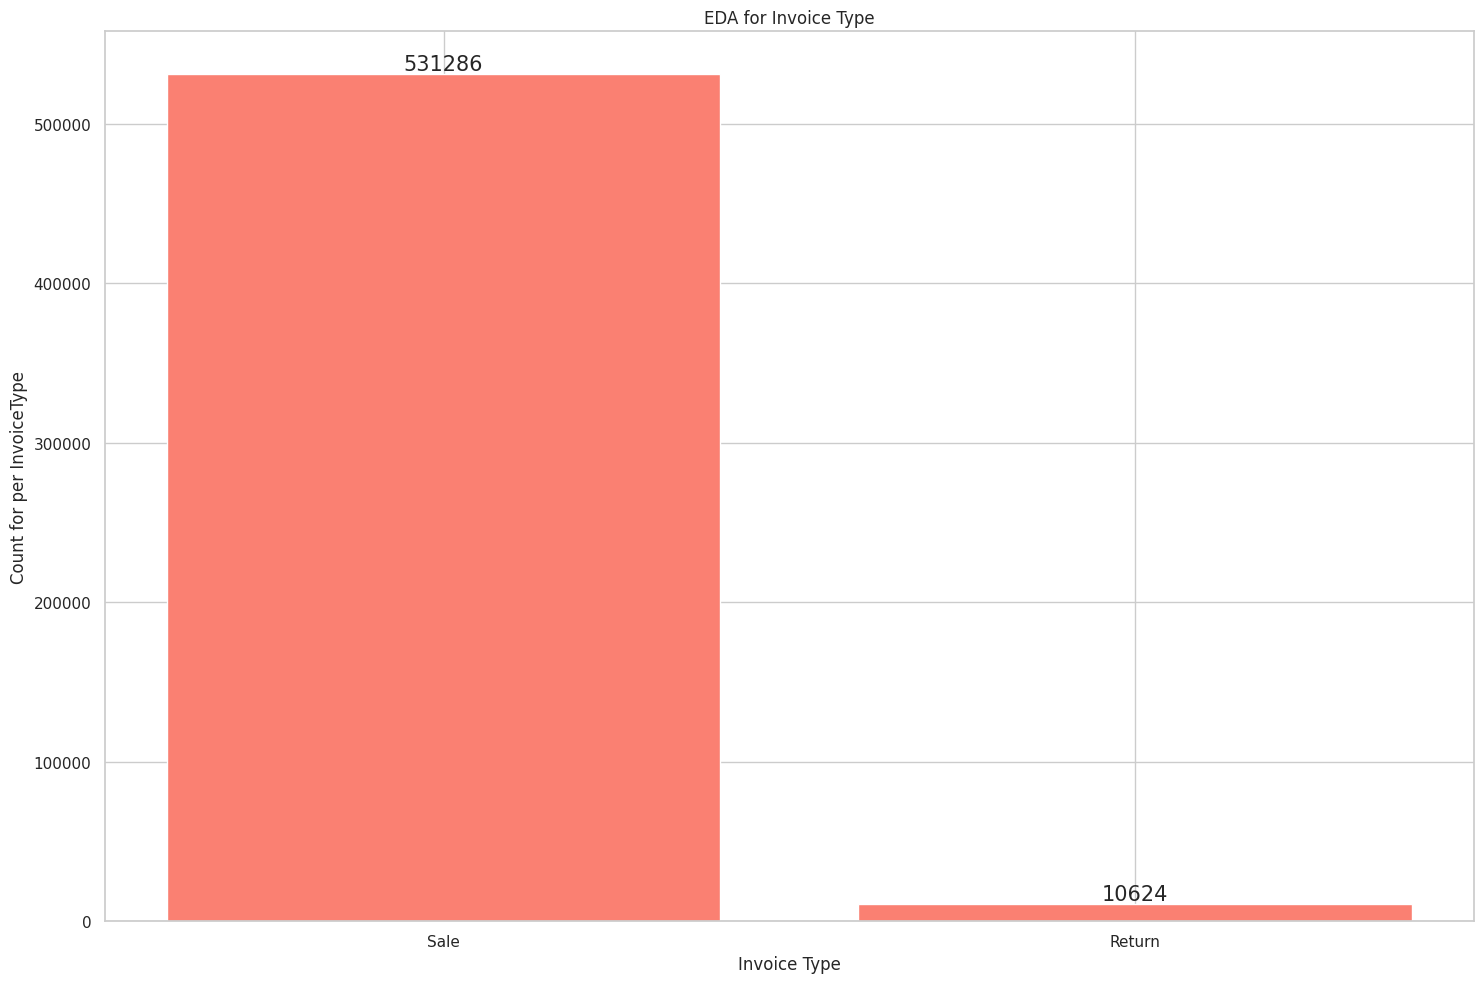

In [17]:
plt.figure(figsize=[15,10])
bar2=plt.bar(EDA_Invoice_type['Invoice_Type'], EDA_Invoice_type['InvoiceCounts'], color='salmon')
for bar in bar2:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+5,yval, ha='center',va='bottom', fontsize=15)
plt.xlabel('Invoice Type')
plt.ylabel('Count for per InvoiceType')
plt.title('EDA for Invoice Type')
plt.tight_layout()
plt.show()

In [18]:
print(df_retail['Is_Valid_Sale'].unique())

EDA_Is_Valid_Sale=df_retail['Is_Valid_Sale'].value_counts().reset_index()
EDA_Is_Valid_Sale.columns=['Is_Valid_Sale','Is_Valid_SaleCounts']
print(EDA_Is_Valid_Sale)

[1 0]
   Is_Valid_Sale  Is_Valid_SaleCounts
0              1               526578
1              0                15332


# EDA for Financial_Impact

In [19]:
EDA_Financial_Impact=df_retail.groupby('Reason_Category')['Financial_Impact'].agg('sum').apply(abs).reset_index()
EDA_Financial_Impact=EDA_Financial_Impact.loc[EDA_Financial_Impact['Financial_Impact']!=0]
print(EDA_Financial_Impact.sort_values(by='Financial_Impact', ascending=False))

          Reason_Category  Financial_Impact
4                  Return        896812.490
3  Postage / Shipping Fee        284431.700
2       Manual Adjustment         92038.911
0  Damaged / Missing Item         38075.950
1     Fraud / False Order          3472.690


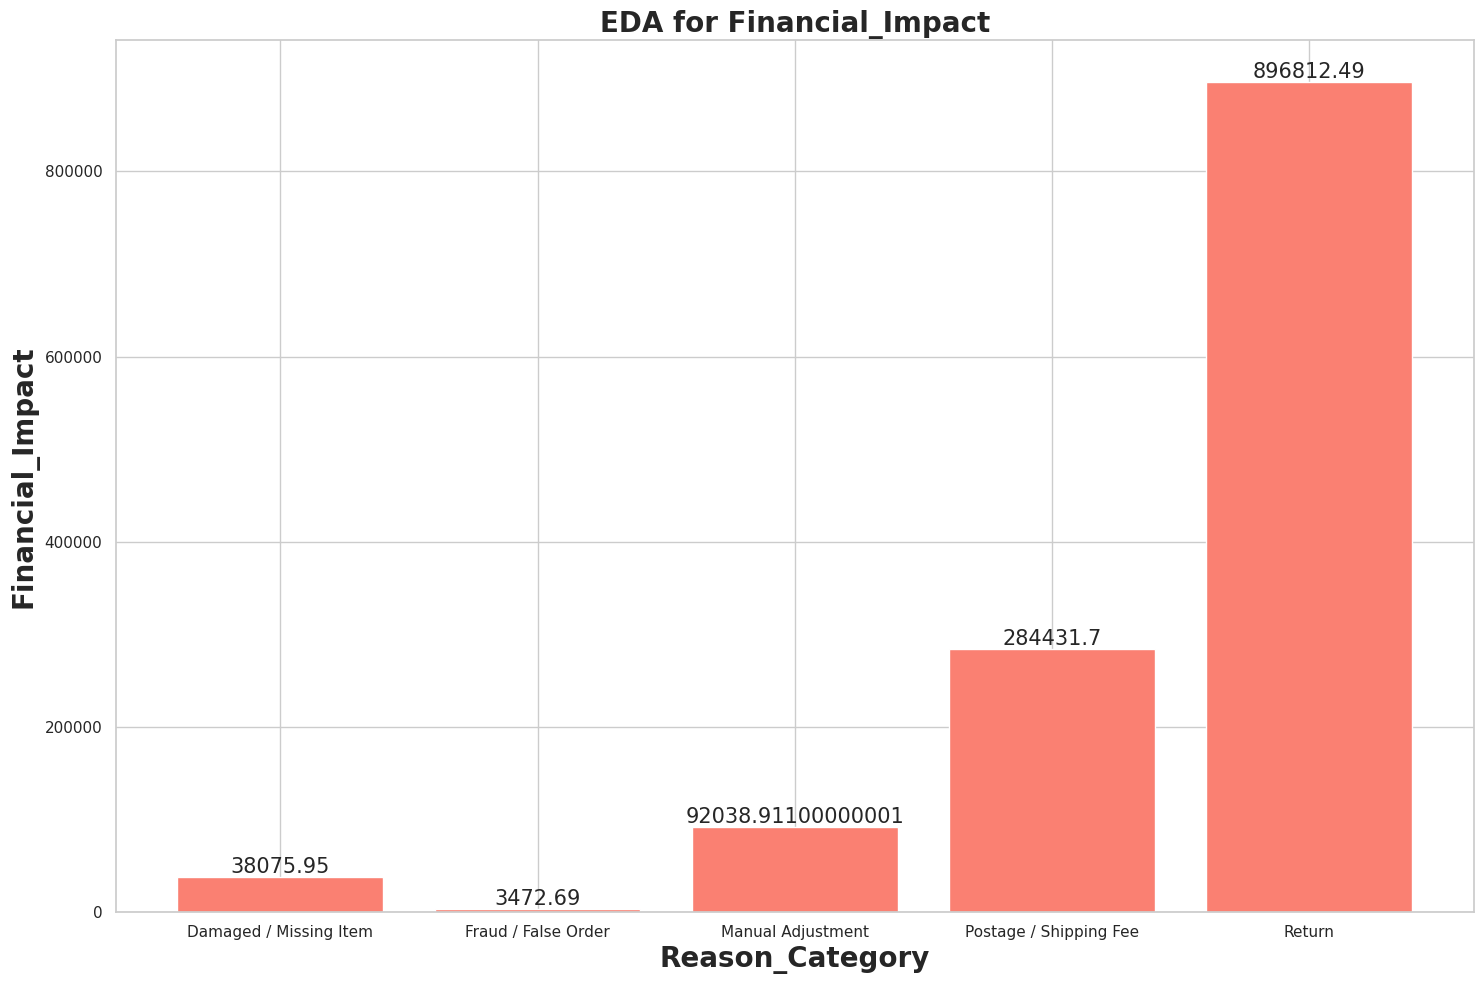

In [20]:
plt.figure(figsize=(15,10))
bar2=plt.bar(EDA_Financial_Impact['Reason_Category'], EDA_Financial_Impact['Financial_Impact'], color='salmon')
for bar in bar2:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+5,yval, ha='center',va='bottom', fontsize=15)
plt.xlabel('Reason_Category',fontsize=20,fontweight='bold')
plt.ylabel('Financial_Impact',fontsize=20,fontweight='bold')
plt.title('EDA for Financial_Impact',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

# EDA for Customer TYPE

In [21]:
print(df_retail['Customer_Type'].unique())
EDA_customer_type=df_retail['Customer_Type'].value_counts().reset_index()
EDA_customer_type.columns=['Customer_Type','Count for each Customer']
print(EDA_customer_type)

['Customer' 'Guest']
  Customer_Type  Count for each Customer
0      Customer                   406830
1         Guest                   135080


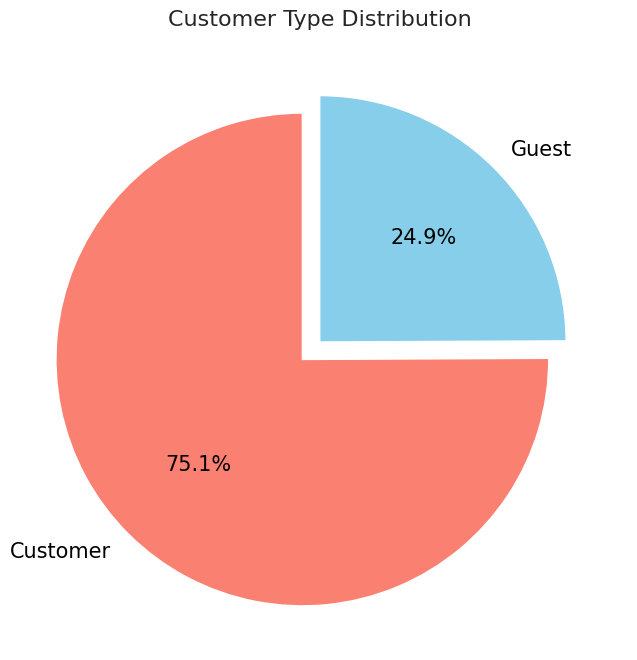

In [22]:
plt.figure(figsize=(8,8))
colors=['salmon','skyblue']
explode = [0.1,0]
plt.pie(EDA_customer_type['Count for each Customer'],labels=EDA_customer_type['Customer_Type'],autopct='%1.1f%%',startangle=90,colors=colors,explode=explode,
       textprops={'fontsize':15, 'color':'black'})
plt.title('Customer Type Distribution', fontsize=16)
plt.show()

# EDA invoice count

In [23]:
total_invoice_count=df_retail['Customer_Invoice_Count'].drop_duplicates()
print('Total number of invoice:',total_invoice_count.sum())
print('Average number of invoice per customer:',total_invoice_count.mean())

Total number of invoice: 3702
Average number of invoice per customer: 63.827586206896555


# Measure Exploration

In [24]:
Invoice_count_per_customer=df_retail[['Customer ID','Customer_Invoice_Count']]
sort_indvoice=Invoice_count_per_customer.sort_values(by='Customer_Invoice_Count',ascending=False)
distinct_invoice=sort_indvoice.drop_duplicates()
min_index = distinct_invoice['Customer_Invoice_Count'].idxmin()
max_index = distinct_invoice['Customer_Invoice_Count'].idxmax()
min_row=distinct_invoice.loc[min_index]
max_row=distinct_invoice.loc[max_index]
min_max_table = pd.DataFrame({
    'Summary': ['Minimum', 'Maximum'],
    'Customer ID': [min_row['Customer ID'],max_row['Customer ID']],
    'Values': [min_row['Customer_Invoice_Count'],max_row['Customer_Invoice_Count']]
})
print(min_max_table)




   Summary     Customer ID  Values
0  Minimum           14213       0
1  Maximum  Guest Customer    1469


# Top 5 Customer interms of invoice count

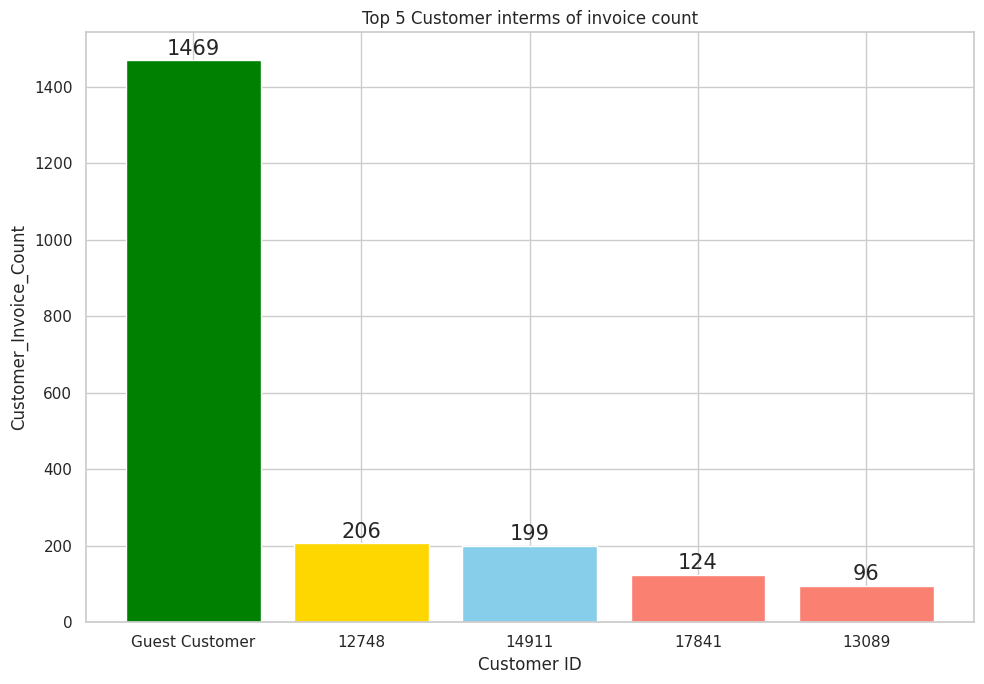

In [25]:
Invoice_count_per_customer=df_retail[['Customer ID','Customer_Invoice_Count']]
sort_indvoice=Invoice_count_per_customer.sort_values(by='Customer_Invoice_Count',ascending=False)
distinct_invoice=sort_indvoice.drop_duplicates()
Top_5=distinct_invoice.head(5)
plt.figure(figsize=[10,7])
bar1=plt.bar(Top_5['Customer ID'],Top_5['Customer_Invoice_Count'],color=['green', 'gold', 'skyblue', 'salmon', 'salmon'])
for bar in bar1:
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+5,yval, ha='center',va='bottom', fontsize=15)

plt.xlabel('Customer ID')
plt.ylabel('Customer_Invoice_Count')
plt.title('Top 5 Customer interms of invoice count')
plt.tight_layout()
plt.show()

# EDA Customer_order_Quantity_Sum


In [26]:
Total_product_quantity=df_retail['Customer_Quantity_Sum'].drop_duplicates()
print('Total number of order quantity:',Total_product_quantity.sum())
print('Total avg number of order per customer:',Total_product_quantity.mean())
print('Median value:',Total_product_quantity.median())

Total number of order quantity: 4603064
Total avg number of order per customer: 2642.401836969001
Median value: 1006.5


In [27]:
df_qty=df_retail[['Customer ID','Customer_Quantity_Sum']]
df_qty=df_qty.drop_duplicates().sort_values(by='Customer_Quantity_Sum',ascending=False)
max_index=df_qty['Customer_Quantity_Sum'].idxmax()
min_index=df_qty['Customer_Quantity_Sum'].idxmin()
max_row=df_qty.loc[max_index]
min_row=df_qty.loc[min_index]
min_max_qty=pd.DataFrame({'Summery':['Minimum','Maximum'], 'Customer ID':[min_row['Customer ID'],max_row['Customer ID']],
                         'Values':[min_row['Customer_Quantity_Sum'],max_row['Customer_Quantity_Sum']]})
print(min_max_qty)

   Summery     Customer ID  Values
0  Minimum           17846       0
1  Maximum  Guest Customer  431913


# Customer order quantity based on Invoice type

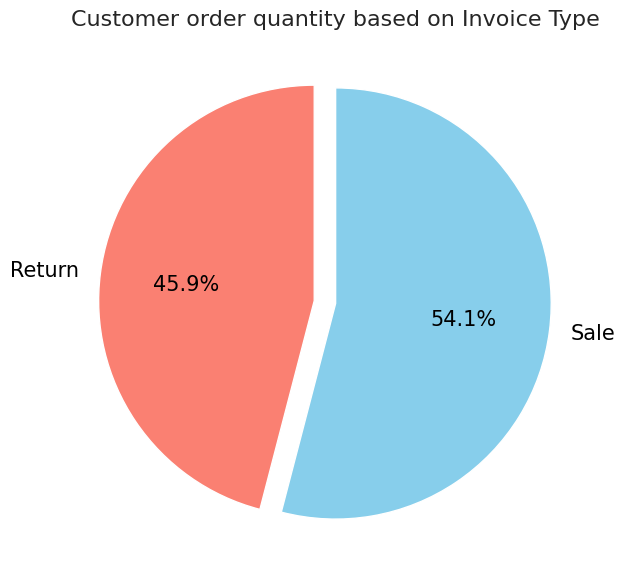

In [28]:
df_qty_invoice=df_retail[['Invoice_Type','Customer_Quantity_Sum']].drop_duplicates()

df_qty_invoice= df_qty_invoice.groupby('Invoice_Type')['Customer_Quantity_Sum'].sum().reset_index()
colors=['salmon','skyblue']
explode=[0.1,0]
plt.figure(figsize=(7,7))
plt.pie(df_qty_invoice['Customer_Quantity_Sum'],labels=df_qty_invoice['Invoice_Type'],autopct='%1.1f%%',startangle=90,colors=colors,explode=explode,
       textprops={'fontsize':15, 'color':'black'})
plt.title('Customer order quantity based on Invoice Type',fontsize=16)
plt.show()

# Customer order Quantity Distribution among Reason Categpry

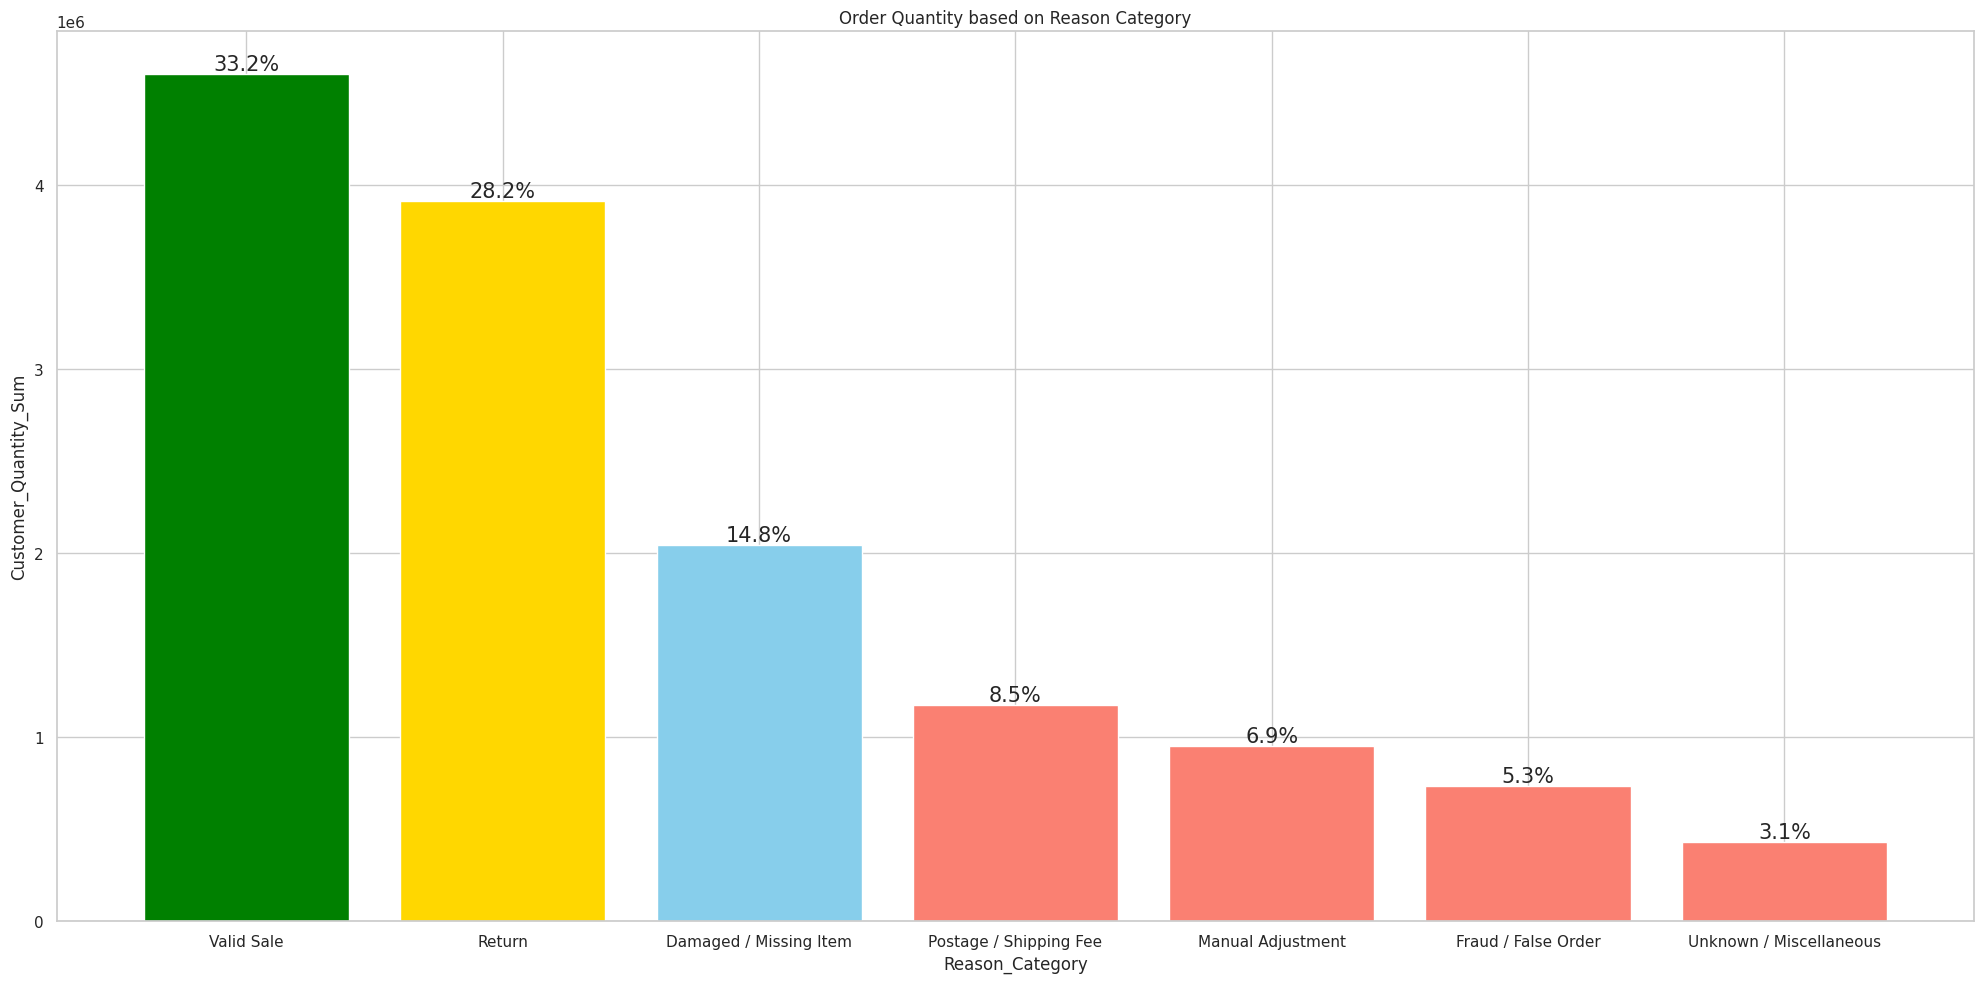

In [29]:
df_qty_reason=df_retail[['Reason_Category','Customer_Quantity_Sum']].drop_duplicates()
TotalQty=df_qty_reason['Customer_Quantity_Sum'].sum()

df_qty_reason= df_qty_reason.groupby('Reason_Category')['Customer_Quantity_Sum'].sum().reset_index()
df_qty_reason=df_qty_reason.sort_values(by='Customer_Quantity_Sum', ascending=False)
df_qty_reason['Percentage']=df_qty_reason['Customer_Quantity_Sum'].apply(lambda x: x/TotalQty*100)

top_color=['green', 'gold', 'skyblue']
plt.figure(figsize=[20,10])
bar1=plt.bar(df_qty_reason['Reason_Category'],df_qty_reason['Customer_Quantity_Sum'],color=[top_color[i] if i<3 else 'salmon'for i in range(len(df_qty_reason))])
for bar, perc in zip(bar1, df_qty_reason['Percentage']):
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+5,f"{perc:.1f}%", ha='center',va='bottom', fontsize=15)

plt.xlabel('Reason_Category')
plt.ylabel('Customer_Quantity_Sum')
plt.title('Order Quantity based on Reason Category')
plt.tight_layout()
plt.show()

# EDA for Customer Revenue

In [30]:
TotalCustomerRevenue=df_retail[['Customer ID','Customer_Revenue_Sum']].drop_duplicates()
sort_TotalCustomerRevenue=TotalCustomerRevenue.sort_values(by='Customer_Revenue_Sum',ascending=False)
print('Total Revenue',sort_TotalCustomerRevenue['Customer_Revenue_Sum'].sum())
print('Average Revenue per Customer',sort_TotalCustomerRevenue['Customer_Revenue_Sum'].mean())
print('Median Value',sort_TotalCustomerRevenue['Customer_Revenue_Sum'].median())

Total Revenue 10226559.173
Average Revenue per Customer 2338.5682993368396
Median Value 656.63


In [31]:
TotalCustomerRevenue=df_retail[['Customer ID','Customer_Revenue_Sum']].drop_duplicates()
max_indx=TotalCustomerRevenue['Customer_Revenue_Sum'].idxmax()
min_indx=TotalCustomerRevenue['Customer_Revenue_Sum'].idxmin()
max_row=TotalCustomerRevenue.loc[max_indx]
min_row=TotalCustomerRevenue.loc[min_indx]
min_max_rev=pd.DataFrame({'Summery':['Minimum','Maximum'], 'Customer ID':[min_row['Customer ID'],max_row['Customer ID']],
                         'Values':[min_row['Customer_Revenue_Sum'],max_row['Customer_Revenue_Sum']]})
print(min_max_rev)

   Summery     Customer ID      Values
0  Minimum           17547        0.00
1  Maximum  Guest Customer  1495460.23


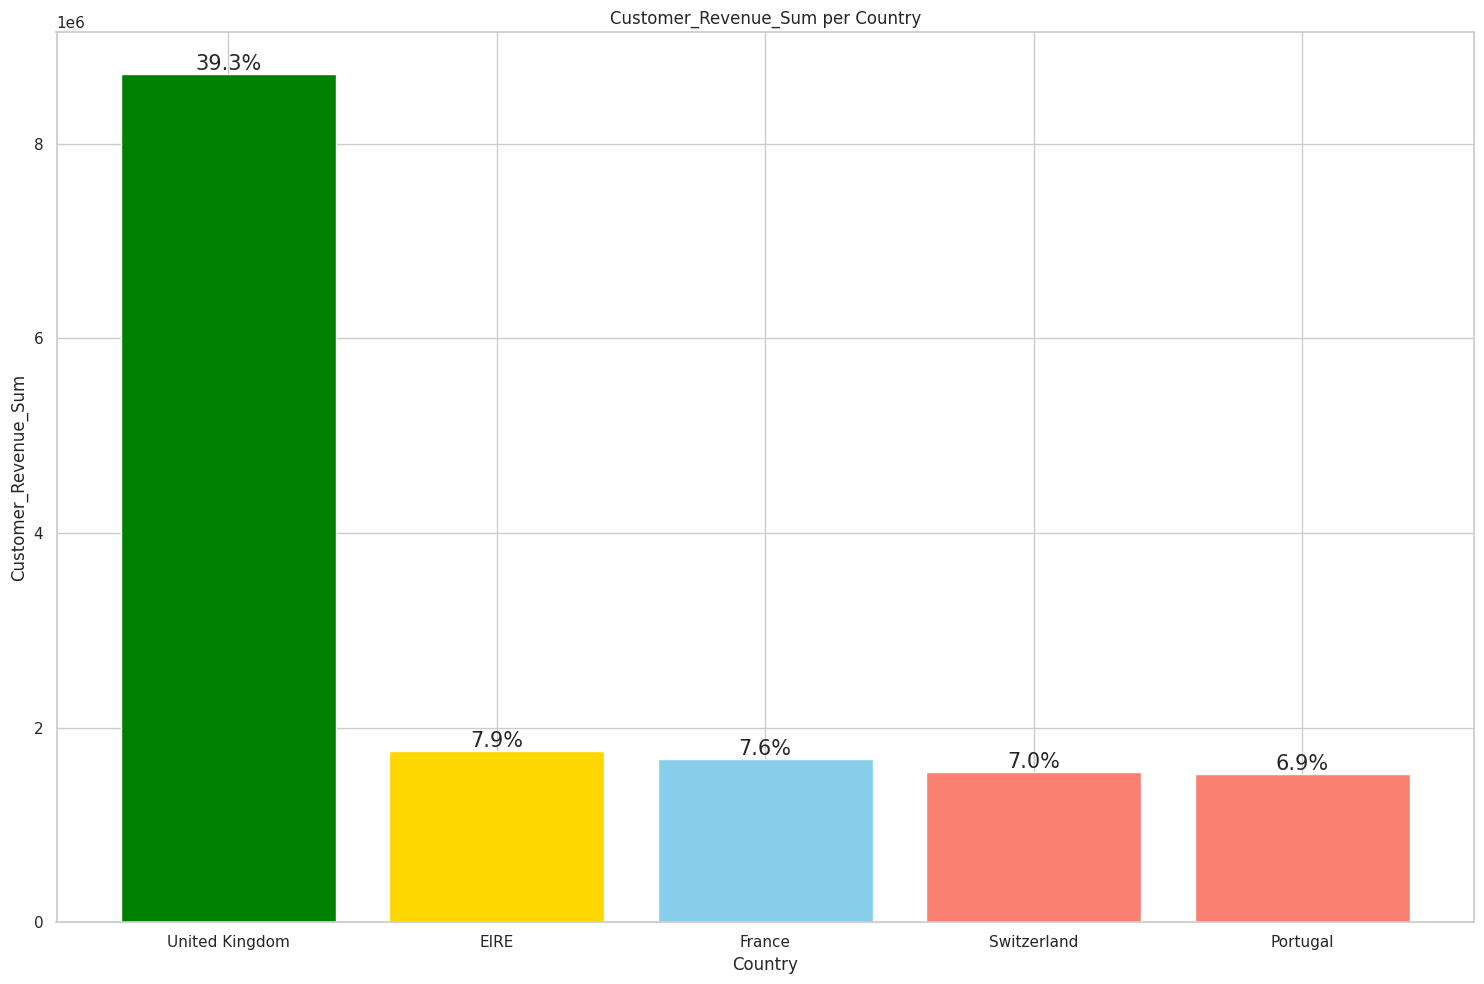

In [54]:
TotalCustomerRevenue=df_retail[['Country','Customer_Revenue_Sum']].drop_duplicates()
df_TotalCustomerRevenue=TotalCustomerRevenue.groupby('Country')['Customer_Revenue_Sum'].sum().reset_index().sort_values(by='Customer_Revenue_Sum',ascending=False)
Totalsum=df_TotalCustomerRevenue['Customer_Revenue_Sum'].sum()
Top_5=df_TotalCustomerRevenue.head(5).copy()
Top_5['percentage']=Top_5['Customer_Revenue_Sum']/Totalsum*100
top_color=['green', 'gold', 'skyblue']
plt.figure(figsize=(15,10))
x=Top_5['Country']
y=Top_5['Customer_Revenue_Sum']
bar1=plt.bar(x,y,color=[top_color[i] if i<3 else 'salmon' for i in range(len(Top_5))])
for bar, perc in zip(bar1,Top_5['percentage']):
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+5,f"{perc:.1f}%", ha='center',va='bottom', fontsize=15)
    
plt.xlabel('Country')
plt.ylabel('Customer_Revenue_Sum')
plt.title('Customer_Revenue_Sum per Country')
plt.tight_layout()
plt.show()

# EDA for Recency Days

In [33]:
AvgRecencyDays=df_retail['Recency_Days'].mean()
MedianRecencyDays=df_retail['Recency_Days'].median()
print('Average Recency days per customer',AvgRecencyDays)
print('Median Recency',MedianRecencyDays)

Average Recency days per customer 30.650351534387628
Median Recency 8.0


In [34]:
df_recency=df_retail[['Customer ID','Recency_Days']].drop_duplicates()
max_indx=df_recency['Recency_Days'].idxmax()
min_indx=df_recency['Recency_Days'].idxmin()
max_row=df_recency.loc[max_indx]
min_row=df_recency.loc[min_indx]
min_max_recency=pd.DataFrame({'Summery':['Minimum','Maximum'], 'Customer ID':[min_row['Customer ID'],max_row['Customer ID']],
                         'Values':[min_row['Recency_Days'],max_row['Recency_Days']]})
print(min_max_recency)

   Summery Customer ID  Values
0  Minimum       15311       0
1  Maximum       18074     373


# EDA for Monetary Value

In [35]:
df_monetary=df_retail[['Customer ID','Monetary_Value']].drop_duplicates().sort_values(by='Monetary_Value',ascending=False)
df_monetary_Total=df_retail['Monetary_Value'].mean()
df_monetary_median=df_retail['Monetary_Value'].median()
print('Average Monetary_Value',df_monetary_Total)
print('Median Monetary_Value',df_monetary_median)


Average Monetary_Value 661.0647656916686
Median Monetary_Value 463.18142857142857


In [36]:
df_monetary=df_retail[['Customer ID','Monetary_Value']].drop_duplicates().sort_values(by='Monetary_Value',ascending=False)
max_indx=df_monetary['Monetary_Value'].idxmax()
min_indx=df_monetary['Monetary_Value'].idxmin()
max_row=df_monetary.loc[max_indx]
min_row=df_monetary.loc[min_indx]
min_max_monetary=pd.DataFrame({'Summery':['Minimum','Maximum'], 'Customer ID':[min_row['Customer ID'],max_row['Customer ID']],
                         'Values':[min_row['Monetary_Value'],max_row['Monetary_Value']]})
print(min_max_monetary)

   Summery Customer ID    Values
0  Minimum       17846      0.00
1  Maximum       16446  84236.25
